In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv(r"C:\Users\Lediiaa\Desktop\NTU\KM6312\Group Project\Shorts Trend Predction\processed_short_video_trends_2025.csv")

monthly = pd.read_csv(r"C:\Users\Lediiaa\Desktop\NTU\KM6312\Group Project\Shorts Trend Predction\monthly_trends_2025.csv")
top_hashtags = pd.read_csv(r"C:\Users\Lediiaa\Desktop\NTU\KM6312\Group Project\Shorts Trend Predction\top_hashtags_2025.csv")
top_creators = pd.read_csv(r"C:\Users\Lediiaa\Desktop\NTU\KM6312\Group Project\Shorts Trend Predction\top_creators_impact_2025.csv")

print(df.shape)
df.head()

(48079, 37)


,duration_sec,title_length,num_hashtags,has_emoji,engagement_rate,engagement_per_view,virality_score,completion_ratio,engagement_quality,creator_tier_encoded,...,time_period_morning,time_period_night,music_genre_calm,music_genre_chill,music_genre_electronic,music_genre_energetic,music_genre_other,is_viral,is_trending,trend_score
0,0.367530,-0.246045,0.0,True,0.120069,0.074597,0.011270,0.629268,0.035515,2.0,...,False,False,False,False,True,False,False,1,1,0.646220
1,-1.036022,0.181820,0.0,True,0.113005,0.074597,0.011270,0.547368,0.033646,2.0,...,False,True,False,True,False,False,False,1,0,0.604169
2,-0.780831,-0.246045,0.0,False,0.068111,0.068102,0.014487,0.508696,0.019590,2.0,...,False,False,False,False,False,False,True,0,0,0.435600
3,0.112338,0.823617,0.0,True,0.108156,0.108154,0.010694,0.640541,0.034251,2.0,...,False,False,True,False,False,False,False,0,0,0.583289
4,0.048541,1.465415,0.0,True,0.072400,0.072396,0.016754,0.683333,0.019929,2.0,...,False,False,False,False,True,False,False,0,0,0.491961


In [6]:
# 1 description and check

print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("\nData types:")
print(df.dtypes.head(20))

print("\nMissing values (top 20 columns):")
print(df.isna().sum().head(20))

Number of rows: 48079
Number of columns: 37

Data types:
duration_sec                 float64
title_length                 float64
num_hashtags                 float64
has_emoji                       bool
engagement_rate              float64
engagement_per_view          float64
virality_score               float64
completion_ratio             float64
engagement_quality           float64
creator_tier_encoded         float64
creator_performance_ratio    float64
publish_dayofweek_num          int64
upload_hour                    int64
is_weekend                      bool
is_tiktok                      int64
is_youtube                     int64
is_algorithmic_feed            int64
is_search                      int64
trend_type_encoded             int64
trend_momentum               float64
dtype: object

Missing values (top 20 columns):
duration_sec                 0
title_length                 0
num_hashtags                 0
has_emoji                    0
engagement_rate              0


TikTok: 28844 videos
YouTube: 19235 videos


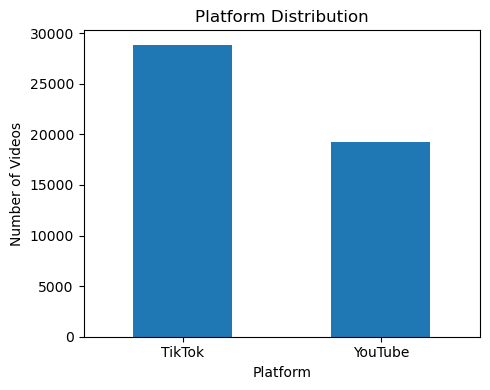

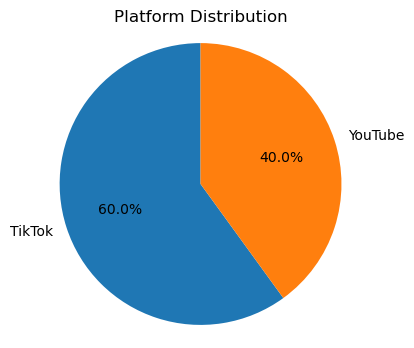

In [36]:
# 2 Platform distribution (TikTok vs YouTube)

platform_counts = {
    "TikTok": df["platform_TikTok"].sum(),
    "YouTube": df["platform_YouTube"].sum()
}

for k, v in platform_counts.items():
    print(f"{k}: {v} videos")

platform_series = pd.Series(platform_counts)

# bar chart

plt.figure(figsize=(5, 4))
platform_series.plot(kind="bar")
plt.title("Platform Distribution")
plt.xlabel("Platform")
plt.ylabel("Number of Videos")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#pie chart

plt.figure(figsize=(4, 4))
plt.pie(
    platform_series,
    labels=platform_series.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Platform Distribution")
plt.axis('equal')
plt.show()

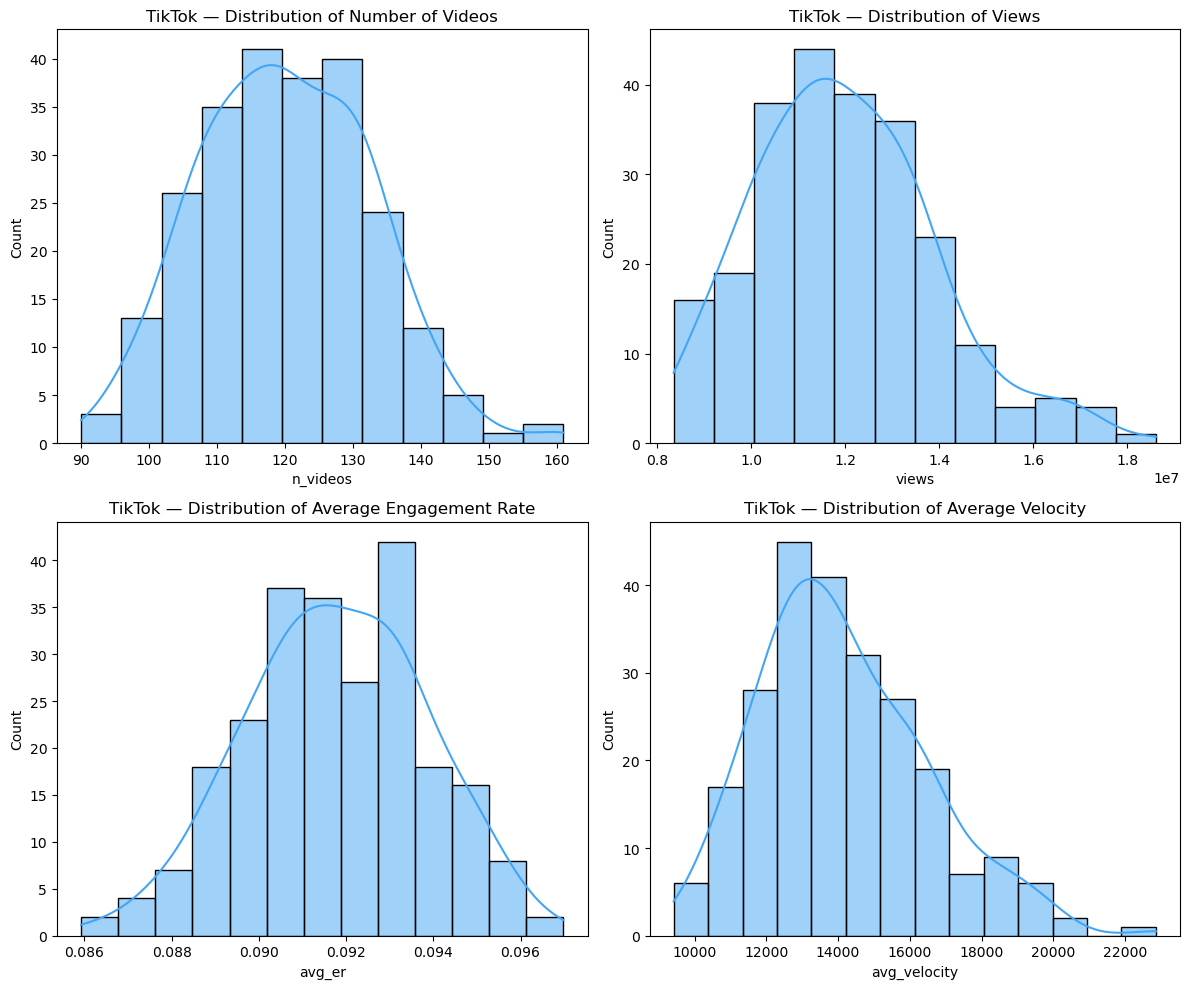

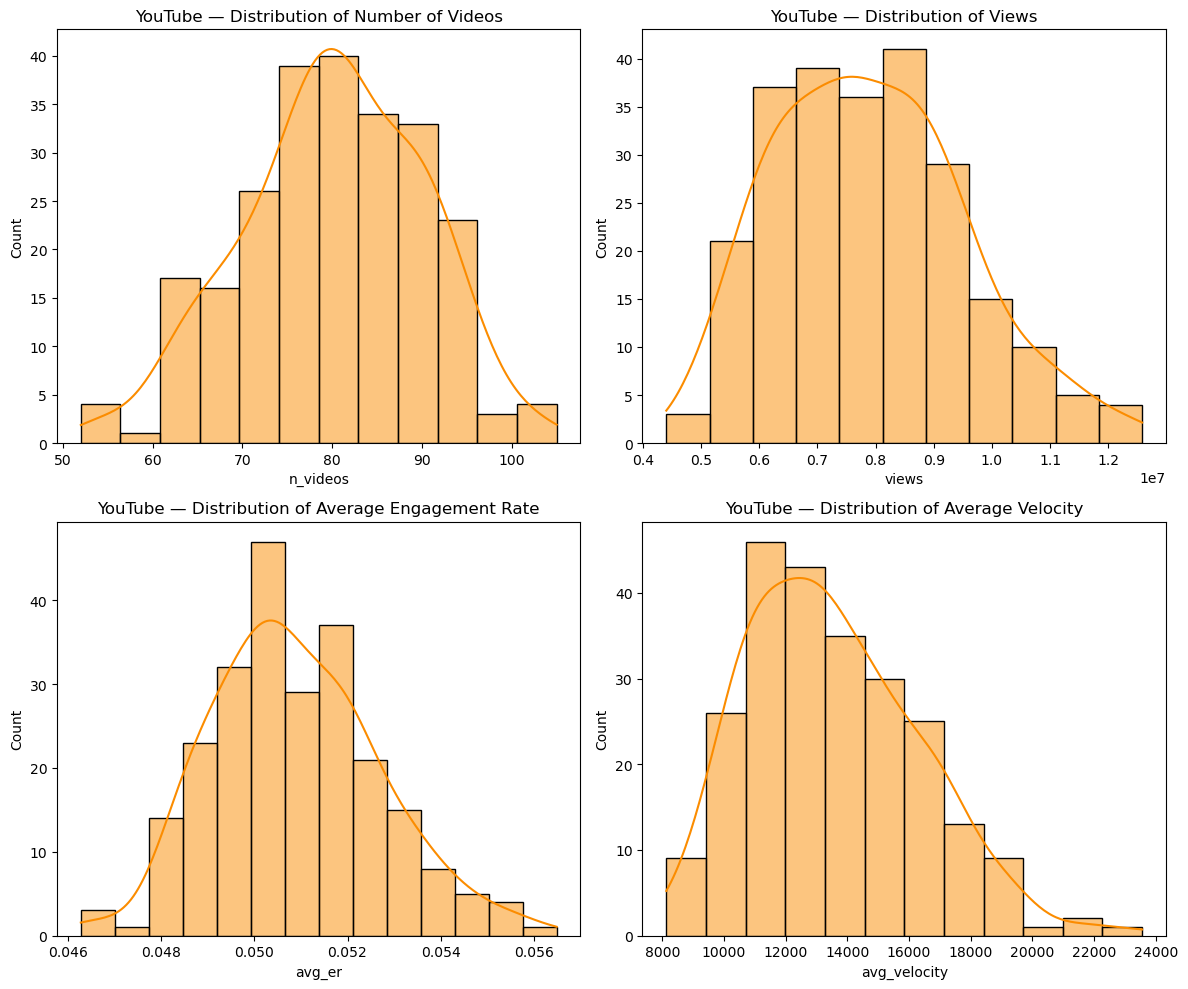

In [63]:
# 3 Distribution of Number of Videos, Views, Average Engagement Rate and Average Velocity

# tiktok 
df_tiktok = monthly[monthly["platform"] == "TikTok"]

cols = [
    ("n_videos", "Distribution of Number of Videos"),
    ("views", "Distribution of Views"),
    ("avg_er", "Distribution of Average Engagement Rate"),
    ("avg_velocity", "Distribution of Average Velocity")
]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, (col, title) in zip(axes.flatten(), cols):
    sns.histplot(
        df_tiktok[col],
        kde=True,
        stat="count",
        color="#42A5F5",
        alpha=0.5,
        ax=ax
    )
    ax.set_title(f"TikTok — {title}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

# youtube
df_youtube = monthly[monthly["platform"] == "YouTube"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, (col, title) in zip(axes.flatten(), cols):
    sns.histplot(
        df_youtube[col],
        kde=True,
        stat="count",
        color="#FB8C00",
        alpha=0.5,
        ax=ax
    )
    ax.set_title(f"YouTube — {title}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

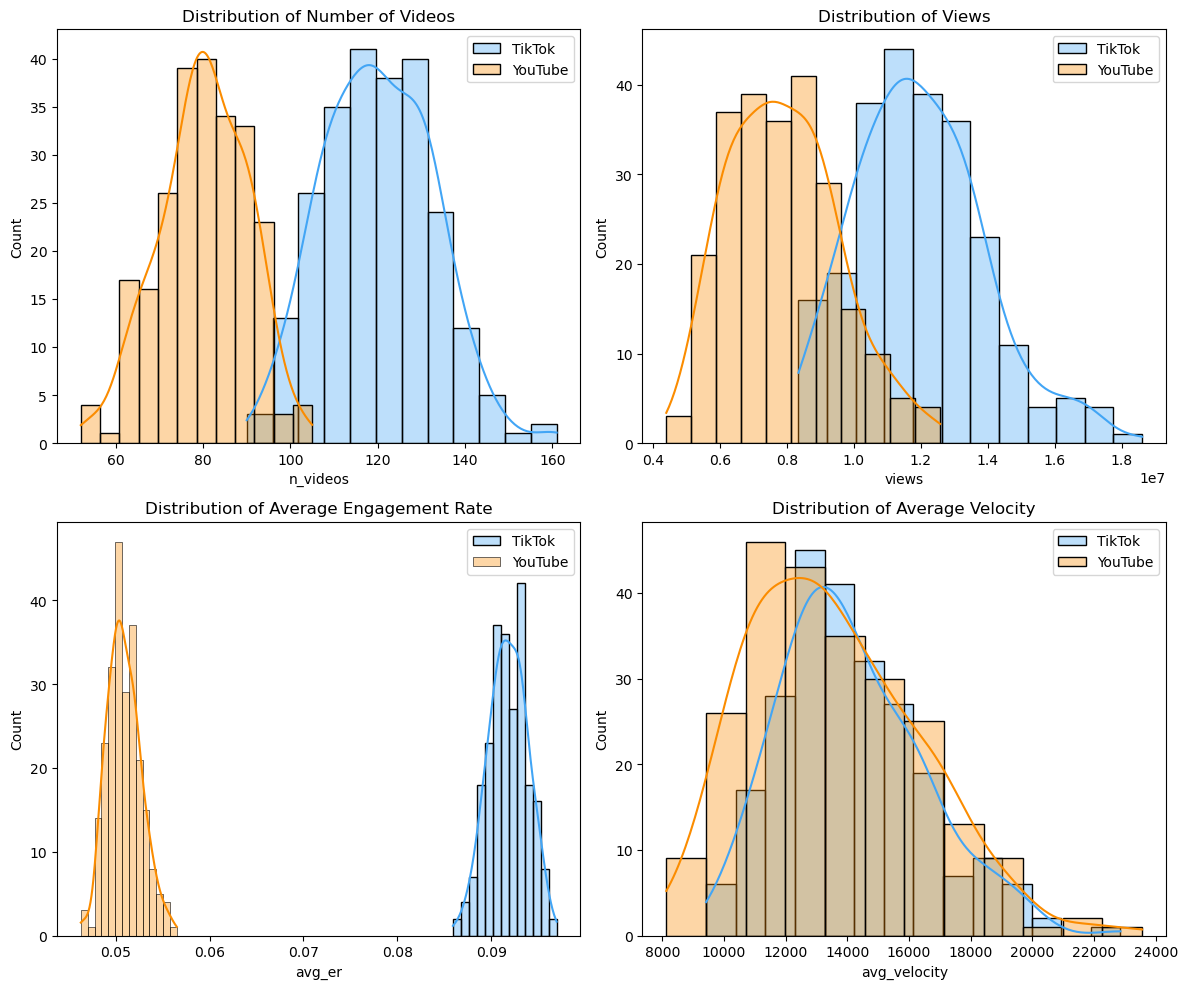

In [61]:
df_tiktok = monthly[monthly["platform"] == "TikTok"]
df_youtube = monthly[monthly["platform"] == "YouTube"]

cols = [
    ("n_videos", "Distribution of Number of Videos"),
    ("views", "Distribution of Views"),
    ("avg_er", "Distribution of Average Engagement Rate"),
    ("avg_velocity", "Distribution of Average Velocity")
]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, (col, title) in zip(axes.flatten(), cols):

    # TikTok
    sns.histplot(
        df_tiktok[col],
        kde=True,
        stat="count",
        color="#42A5F5",
        alpha=0.35,
        ax=ax,
        label="TikTok"
    )

    # YouTube
    sns.histplot(
        df_youtube[col],
        kde=True,
        stat="count",
        color="#FB8C00",
        alpha=0.35,
        ax=ax,
        label="YouTube"
    )

    ax.set_title(title)
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.legend()

plt.tight_layout()
plt.show()

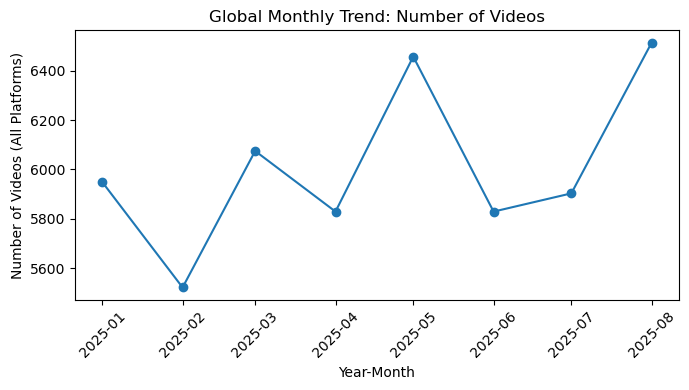

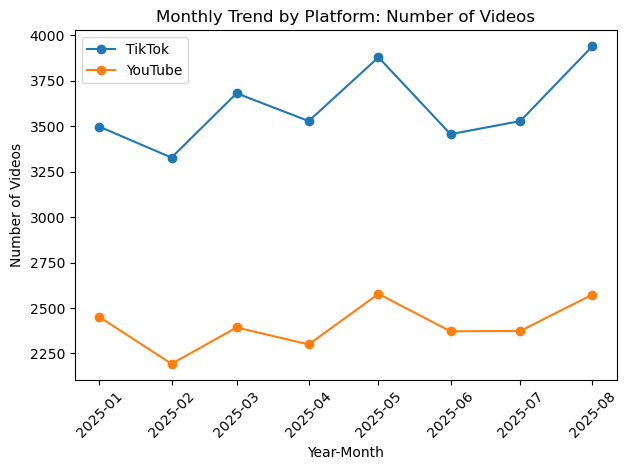

In [69]:
# 4 Monthly trend: number of videos per month

# all platforms

monthly["year_month"] = pd.to_datetime(monthly["year_month"])

global_trend = (
    monthly
    .groupby("year_month", as_index=False)["n_videos"]
    .sum()
    .sort_values("year_month")
)

plt.figure(figsize=(7, 4))

plt.plot(
    global_trend["year_month"],
    global_trend["n_videos"],
    marker="o"
)
plt.title("Global Monthly Trend: Number of Videos")
plt.xlabel("Year-Month")
plt.ylabel("Number of Videos (All Platforms)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# different platforms

platform_trend = (
    monthly
    .groupby(["year_month", "platform"], as_index=False)["n_videos"]
    .sum()
    .sort_values("year_month")
)


for plat in sorted(platform_trend["platform"].unique()):
    sub = platform_trend[platform_trend["platform"] == plat]
    plt.plot(
        sub["year_month"],
        sub["n_videos"],
        marker="o",
        label=plat
    )

plt.title("Monthly Trend by Platform: Number of Videos")
plt.xlabel("Year-Month")
plt.ylabel("Number of Videos")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

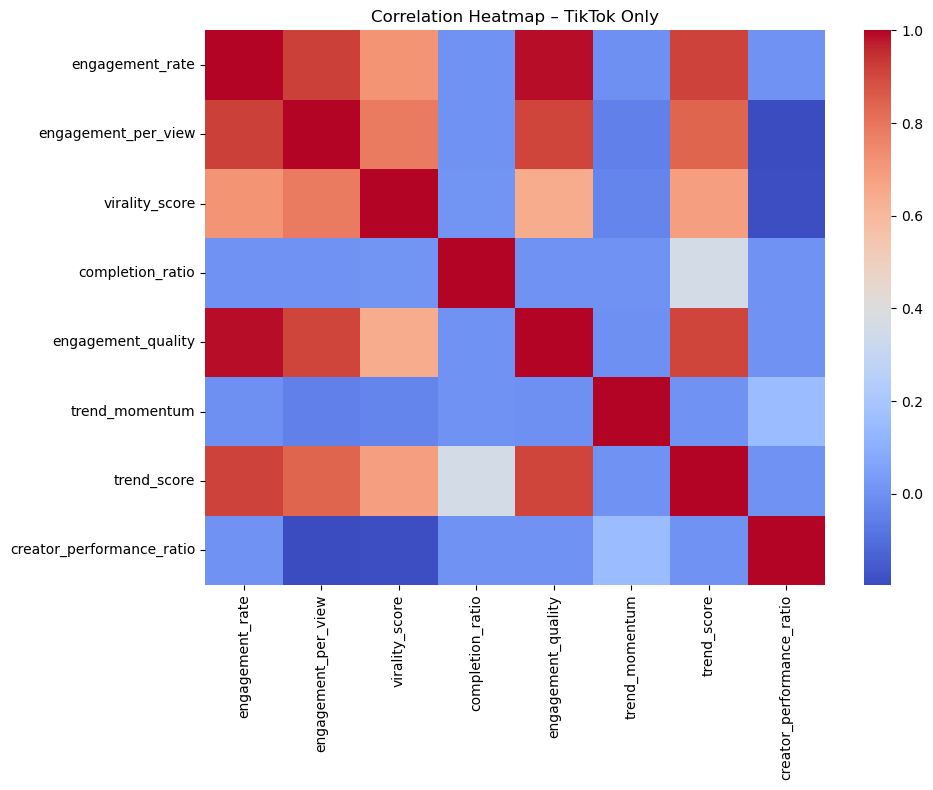

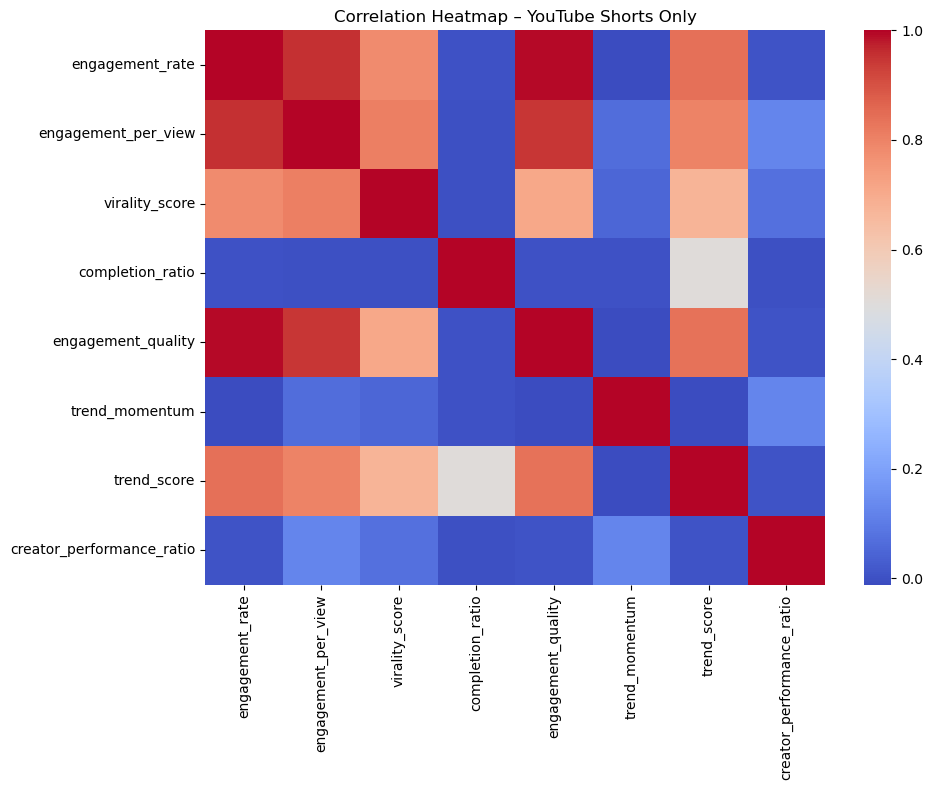

In [59]:
# 5 orrelation heatmap for key metrics

num_cols = [ 
    "engagement_rate",
    "engagement_per_view",
    "virality_score",
    "completion_ratio",
    "engagement_quality",
    "trend_momentum",
    "trend_score",
    "creator_performance_ratio"
]

# tiktok

df_tiktok = df[df["is_tiktok"] == 1]

plt.figure(figsize=(10, 8))
sns.heatmap(df_tiktok[num_cols].corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap – TikTok Only")
plt.tight_layout()
plt.show()

# youtube

df_youtube = df[df["is_youtube"] == 1]

plt.figure(figsize=(10, 8))
sns.heatmap(df_youtube[num_cols].corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap – YouTube Shorts Only")
plt.tight_layout()
plt.show()

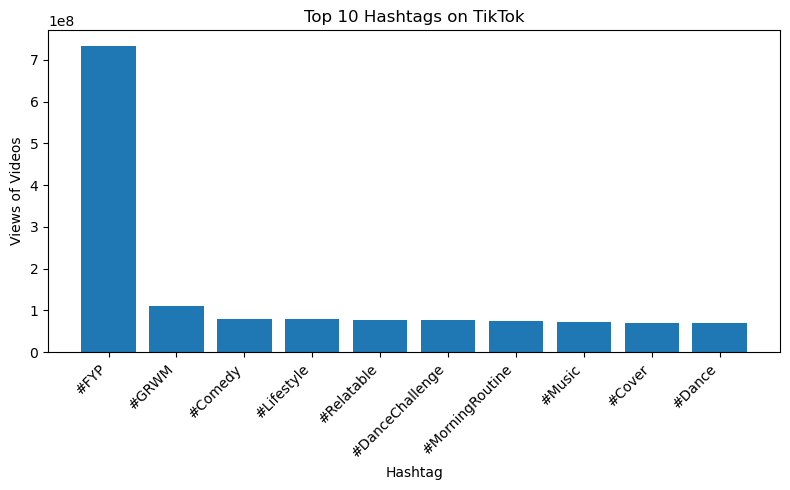

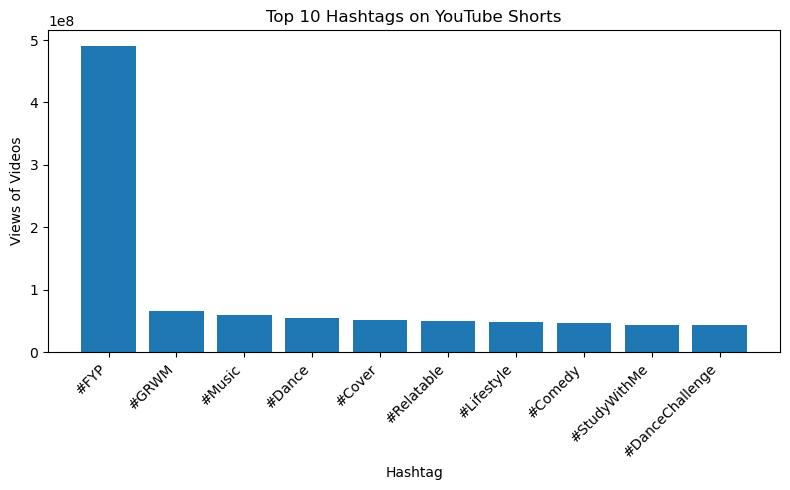

In [42]:
# 6 Top 10 hashtags by views of videos

# tiktok

top10_tiktok = (
    top_hashtags[top_hashtags["platform"] == "TikTok"]
    .groupby("hashtag", as_index=False)["views"]
    .sum()
    .sort_values("views", ascending=False)
    .head(10)
)

plt.figure(figsize=(8, 5))
plt.bar(top10_tiktok["hashtag"], top10_tiktok["views"])
plt.title("Top 10 Hashtags on TikTok")
plt.xlabel("Hashtag")
plt.ylabel("Views of Videos")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# youtube

top10_youtube = (
    top_hashtags[top_hashtags["platform"] == "YouTube"]
    .groupby("hashtag", as_index=False)["views"]
    .sum()
    .sort_values("views", ascending=False)
    .head(10)
)

plt.figure(figsize=(8, 5))
plt.bar(top10_youtube["hashtag"], top10_youtube["views"])
plt.title("Top 10 Hashtags on YouTube Shorts")
plt.xlabel("Hashtag")
plt.ylabel("Views of Videos")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

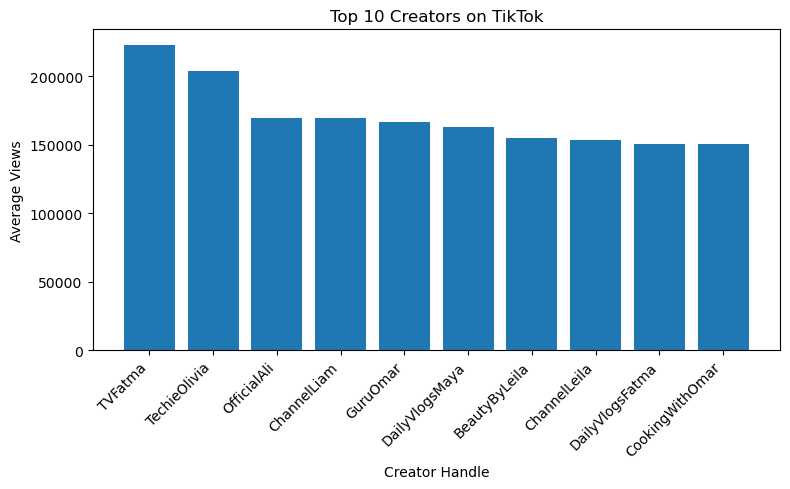

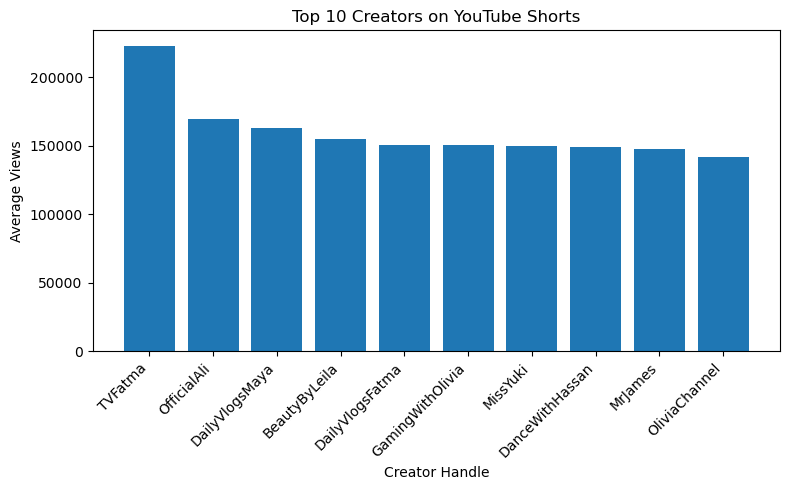

In [55]:
# 7 Top 10 creators by average views

# tiktok

tiktok_creators = top_creators[top_creators["platform"] == "TikTok"]

top10_tiktok = (
    tiktok_creators
    .sort_values("creator_avg_views", ascending=False)
    .head(10)
)

plt.figure(figsize=(8, 5))
plt.bar(
    top10_tiktok["author_handle"],
    top10_tiktok["creator_avg_views"]
)
plt.title("Top 10 Creators on TikTok")
plt.xlabel("Creator Handle")
plt.ylabel("Average Views")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# youtube

yt_creators = top_creators[top_creators["platform"] == "YouTube"]

top10_youtube = (
    yt_creators
    .sort_values("creator_avg_views", ascending=False)
    .head(10)
)

plt.figure(figsize=(8, 5))
plt.bar(
    top10_youtube["author_handle"],
    top10_youtube["creator_avg_views"]
)
plt.title("Top 10 Creators on YouTube Shorts")
plt.xlabel("Creator Handle")
plt.ylabel("Average Views")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()